# Data Science - EDA using Titanic Dataset
[필수조건]
1. 아래의 가설 검증 및 시각화 
1-A 항구에 따라 사망자수의 차이가 있다.
1-B 남성일 경우 사망자가 많다.
1-C 사회적 계층(객실, 요금 등)이 높을수록 사망자가 감소하는 경향이 있다.
1-D 연령이 낮은 경우 사망자가 적으며, 성인의 경우 큰 차이는 없다.
 
2. Target Label인 'Survived'를 제외한 총 11개의 Feature중
   어떤 feature를 고려하면 강력한 Insight를 얻을 수 있을지 EDA 과정 상세하게 출력 (주석 기입) 
 
3. 차별화된 나의 방법 및 결론
- 본인이 생각했을 때 친구들과 비교하여 (타 사이트 등), 내가 특별히 사용한 방법, 나만이 도출했다 생각한 가설, 나만이 구현한 시각화 결과 등 자유롭게 기술
 
4. 끝 부분: 본 과제를 통해 느낀점 기술

### 주요 Column 설명
- PassengerId : Passenger's unique number
- Pclass : 객실 class(1st class, 2nd class, 3rd class)
- SibSp : Sibling + Spouse (동승한 형제자매 + 배우자)
- Parch : Parents + Children (함께 탑승한 부모, 아이의 수)
- Ticket : Ticket number
- Fare : 탑승 요금
- Cabin : 객실 번호 (그러나 공백도 많고 정확한 기준을 알 수 없음)
- Embarked : 탑승 항구 (C=Cherbourg, Q=Queenstown, S=Southampton)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data load

In [2]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 1. 가설 검증 및 시각화 프로세스

## 1-A. 항구에 따라 사망자수의 차이가 있다

In [7]:
# 항구 : Embarked(C= Cherbourg, Q= Queenstown, S= Southampton)
# 방법론 : Embarked에서 C가 나온 횟수, Q가 나온 횟수, S가 나온 횟수를 카운트한다.
# 이후, 생존자와 사망자를 구분하여 각 항구별로 사망자수를 카운트한다.
# 이후, 각 항구별로 사망자수를 시각화한다.

death_counts = df.groupby('Embarked')['Survived'].value_counts().dropna()
death_counts

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [9]:
# Group by 'Embarked' and 'Survived', then count the number of passengers
grouped = df.groupby(['Embarked', 'Survived']).size().unstack()

# Create separate dataframes for survivors and non-survivors
survivors = grouped[1]
non_survivors = grouped[0]

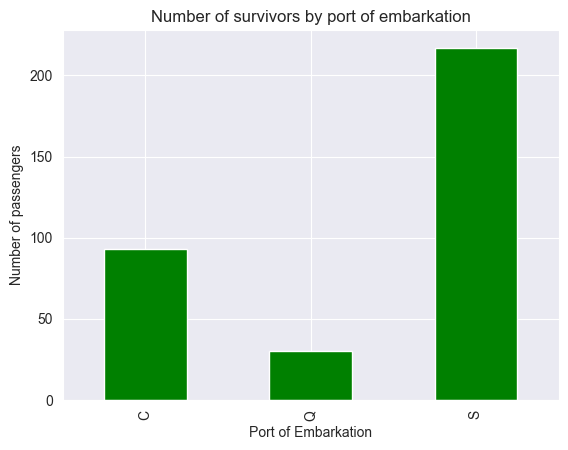

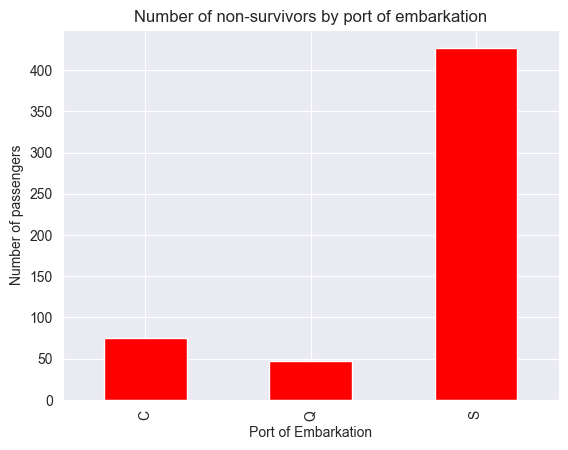

In [10]:
# Plot the results for survivors
survivors.plot(kind='bar', stacked=True, color='g')
plt.title('Number of survivors by port of embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Number of passengers')
plt.show()

# Plot the results for non-survivors
non_survivors.plot(kind='bar', stacked=True, color='r')
plt.title('Number of non-survivors by port of embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Number of passengers')
plt.show()

## 1-B. 남성일 경우 사망자가 많다

## 1-C. 사회적 계층(객실, 요금 등)이 높을 수록 사망자가 감소하는 경향이 있다

## 1-D. 연령이 낮은 경우 사망자가 적으며, 성인의 경우 큰 차이는 없다.

# 2. EDA